In [16]:
import  pandas as pd
import numpy as np

In [ ]:
# Connect to the correct directory - i had a hard time with this ehh
import os
os.chdir('/Users/ermi/desktop/AI-ML-Assignment-2-Linear-Regression')

# Load the dataset
df = pd.read_csv('kc_house_data_NaN.csv')

# Display first five rows
df.head()

# Check dataset information
df.info()

# Check for any missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Get basic statistics
print("Basic statistics:")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
# Check for outliers in bedrooms
print("Bedroom distribution:")
print(df['bedrooms'].value_counts().sort_index())
print("\n")

# Check houses with unusual bedroom 
print("Houses with 10+ bedrooms:")
print(df[df['bedrooms'] >= 10][['bedrooms', 'bathrooms', 'sqft_living', 'price']])

Bedroom distribution:
bedrooms
1.0      199
2.0     2760
3.0     9824
4.0     6882
5.0     1601
6.0      272
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64


Houses with 10+ bedrooms:
       bedrooms  bathrooms  sqft_living      price
8757       11.0       3.00         3000   520000.0
13314      10.0       5.25         4590  1148000.0
15161      10.0       2.00         3610   650000.0
15870      33.0       1.75         1620   640000.0
19254      10.0       3.00         2920   660000.0


In [19]:
# Remove the outlier
print(f"Original dataset size: {len(df)}")

# houses with reasonable bedroom counts 
df = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 10)]

print(f"After removing outliers: {len(df)}")
print(f"Removed {21613 - len(df)} rows")

# check again 
print(f"\nNew bedroom range: {df['bedrooms'].min()} to {df['bedrooms'].max()}")

Original dataset size: 21613
After removing outliers: 21598
Removed 15 rows

New bedroom range: 1.0 to 10.0


In [20]:
# Feature Engineering: Create house_age
df['house_age'] = 2025 - df['yr_built']

# Check the new feature
print("House Age Statistics:")
print(df['house_age'].describe())
print("\n")

# Select our features (X) and target (y)
# We'll use sqft_living as our main feature
X = df[['sqft_living']]  
y = df['price']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

House Age Statistics:
count    21598.000000
mean        53.999028
std         29.372670
min         10.000000
25%         28.000000
50%         50.000000
75%         74.000000
max        125.000000
Name: house_age, dtype: float64


Features (X) shape: (21598, 1)
Target (y) shape: (21598,)


In [22]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print("\n" + "="*50 + "\n")

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")
print(f"Model coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model intercept: {model.intercept_:.2f}")

Training set: 17278 samples
Testing set: 4320 samples


✅ Model trained successfully!
Model coefficient (slope): 279.09
Model intercept: -40942.23


In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*50)
print("MODEL EVALUATION METRICS")
print("="*50)
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${mse**0.5:,.2f}")
print(f"R-squared (R²): {r2:.4f}")
print("="*50)
print("\nInterpretation:")
print(f"- The model explains {r2*100:.2f}% of the variance in house prices")
print(f"- Average prediction error: ~${mse**0.5:,.2f}")

MODEL EVALUATION METRICS
Mean Squared Error (MSE): $67,137,959,511.78
Root Mean Squared Error (RMSE): $259,109.94
R-squared (R²): 0.5108

Interpretation:
- The model explains 51.08% of the variance in house prices
- Average prediction error: ~$259,109.94


Matplotlib is building the font cache; this may take a moment.


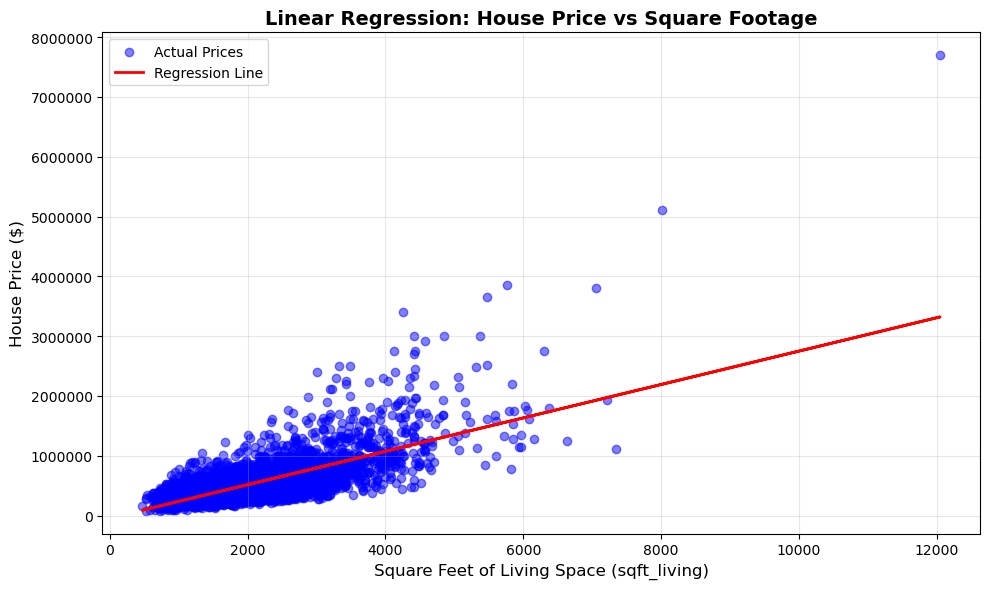

✅ Visualization complete!


In [24]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Prices', color='blue')

# Plot regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Square Feet of Living Space (sqft_living)', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.title('Linear Regression: House Price vs Square Footage', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Format y-axis to show prices nicely
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print("✅ Visualization complete!")